# Python(Jupyter Notebook)による回答例

## レポート試験問題の回答例

この文書はブラウザ上で稼働するPython環境であるJupyter Notebookを利用して作成しています。

Windowsでは以下の実行のためのPython環境はAnacondaをインストールすると良いです。Python環境に加え、numpy、scipy、matplotlibなどのライブラリや、このノートブックに実行に必要なJupyter Notebookがインストールされるので、インストーラをダブルクリックし、指示に従いインストールを行った後、Jupyter Notebookのアイコンで起動してください。

[Anaconda (from Continuum)](https://www.continuum.io/downloads)

## パッケージのインポート

In [1]:
import numpy as np
import scipy as sp
import scipy.stats
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## データの読み込み

データは以下のディレクトリからダウンロードしてください。以下の読み込み時にはファイルパスは適宜、自分でダウンロードした場所に変更してください。

https://art.ist.hokudai.ac.jp/~takigawa/course/da2016/pdf/dataset.csv

In [2]:
data = pd.read_csv('/Users/takigawa/Documents/artist/course/da2016/pdf/dataset.csv', header=None)

データの中身は以下のようになっています。最初の行がヘッダではないので読み込み時に header=Noneが必要なことに注意してください。

In [3]:
data.columns = ['番号', '新生時の体重', '母親の体重', '母親の年齢', '懐妊期間(日)', '喫煙習慣の有無']
data

,番号,新生時の体重,母親の体重,母親の年齢,懐妊期間(日),喫煙習慣の有無
0,1,3087,48,28,304,0
1,2,3229,52,24,286,1
2,3,3204,61,33,273,1
3,4,3346,58,30,295,0
4,5,3579,56,21,290,0
5,6,2325,46,26,262,0
6,7,3159,55,30,318,1
7,8,3589,63,37,298,0
8,9,2969,52,25,299,1
9,10,2819,40,22,313,0


データの最初のみを見るには head() を利用します。

In [4]:
data.head()

,番号,新生時の体重,母親の体重,母親の年齢,懐妊期間(日),喫煙習慣の有無
0,1,3087,48,28,304,0
1,2,3229,52,24,286,1
2,3,3204,61,33,273,1
3,4,3346,58,30,295,0
4,5,3579,56,21,290,0


データの方は pandas のデータフレームになっているので、これをnumpy配列にしておきます。

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
x = data.as_matrix()

In [7]:
type(x)

numpy.ndarray

## データの整形

ここでは目的変数の値を格納するベクトル y および説明行列を格納する行列 X を作成します。

まず、目的変数はxの1列目をそのまま取り出すだけです。

In [8]:
y = np.array(x[:, 1])

つづいて、説明変数行列を作成するので、読み込んだデータの行数、列数を取り出します。yを含む行と、最初のid行の2行分は説明変数ではないため、説明変数の数pは2を引いておきます。

In [9]:
n, p = x.shape
p -= 2

In [10]:
[n, p]

[15, 4]

ここで一度numpy配列であるxの中身を確認しておきます。

In [11]:
x

array([[   1, 3087,   48,   28,  304,    0],
       [   2, 3229,   52,   24,  286,    1],
       [   3, 3204,   61,   33,  273,    1],
       [   4, 3346,   58,   30,  295,    0],
       [   5, 3579,   56,   21,  290,    0],
       [   6, 2325,   46,   26,  262,    0],
       [   7, 3159,   55,   30,  318,    1],
       [   8, 3589,   63,   37,  298,    0],
       [   9, 2969,   52,   25,  299,    1],
       [  10, 2819,   40,   22,  313,    0],
       [  11, 3191,   59,   34,  285,    1],
       [  12, 3346,   57,   28,  306,    0],
       [  13, 2444,   45,   30,  291,    1],
       [  14, 3662,   64,   21,  274,    0],
       [  15, 3241,   53,   29,  283,    0]])

1列目(index=0)はid行、2列目(index=1)は目的変数の値なので、index=2から列をp列選択して、つまり、index=2からindex=p+2まで必要部分を取り出します。

In [12]:
z = x[:, 2:(p+2)]

In [13]:
pd.DataFrame(z).head()

,0,1,2,3
0,48,28,304,0
1,52,24,286,1
2,61,33,273,1
3,58,30,295,0
4,56,21,290,0


さらに定数項のための1ベクトルを最初の列に加えた行列を作成します。

In [14]:
X = np.column_stack((np.ones(n), z))

In [15]:
pd.DataFrame(X).head()

,0,1,2,3,4
0,1,48,28,304,0
1,1,52,24,286,1
2,1,61,33,273,1
3,1,58,30,295,0
4,1,56,21,290,0


## 1. 偏回帰係数の推定

行列公式

\begin{equation*}
\hat{\beta} = (X' X)^{-1} X' y
\end{equation*}

を用いて偏回帰係数を求める。

In [16]:
beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

In [17]:
pd.DataFrame([beta], 
             columns = ['定数項', '変数1', '変数2', '変数3', '変数4'], 
             index = ['偏回帰係数'])

,定数項,変数1,変数2,変数3,変数4
偏回帰係数,-1675.192609,54.896593,-23.470039,8.809766,-140.553893


## 2. 目的変数の予測値の計算

上記の係数を説明行列Xにかけて、yの予測値を計算します。

In [18]:
y_pred = np.dot(X, beta)

yの予測値をx軸に、yの真値をy軸にとって散布図をプロットしてみます。

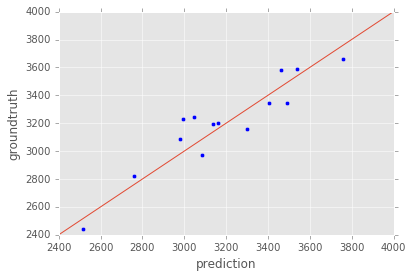

In [19]:
plt.scatter(y_pred, y)
plt.plot([2400, 4000], [2400, 4000])
plt.ylim(2400, 4000)
plt.xlim(2400, 4000)
plt.ylabel('groundtruth')
plt.xlabel('prediction')

## 3. 標準誤差と決定係数の計算

まずはyの要素の平均値を求めておきます。

In [20]:
y_bar = np.mean(y)

次に、平方和(Sum of Squares, SS)を三種類計算します。

全変動(SST)は以下の式で定義されます。

\begin{equation*}
\sum_{i=1}^n (y_i - \bar{y})^2
\end{equation*}

In [21]:
sst = np.sum([ (y[i] - y_bar)**2 for i in range(len(y)) ])

残差変動(SSE)は以下の式で定義されます。

\begin{equation*}
\sum_{i=1}^n (y_i - \hat{y}_i)^2
\end{equation*}

In [22]:
sse = np.sum([ (y[i] - y_pred[i])**2 for i in range(len(y)) ])

回帰変動(SSR)は以下の式で定義されます。

\begin{equation*}
\sum_{i=1}^n (\hat{y}_i-\bar{y})^2
\end{equation*}

In [23]:
ssr = np.sum([ (y_pred[i] - y_bar)**2 for i in range(len(y)) ])

In [24]:
pd.DataFrame([[y_bar, sst, sse, ssr]],
             columns = ['$\overline y$', '全変動', '残差変動', '回帰変動'],
             index = ['value'])

,$\overline y$,全変動,残差変動,回帰変動
value,3146,2060050,250662.016531,1809387.983469


残差変動を自由度で割ると誤差分散が求められます。その平方根が標準偏差になります。

In [25]:
sig2 = sse/(n-p-1)

回帰変動と全変動の比は「決定係数」という量になります。その平方根が重相関係数になります。

In [26]:
r2 = ssr/sst

また下記のように自由度で割ったものから計算した決定係数を自由度調整済み決定係数と呼びます。

In [27]:
r2_star = 1-(sse/(n-p-1))/(sst/(n-1))

In [28]:
pd.DataFrame([[sig2, np.sqrt(sig2), r2, r2_star, np.sqrt(r2)]],
             columns = ['誤差分散', '標準誤差', '決定係数', '(自由調整済)', '重相関'],
             index = ['value'])

,誤差分散,標準誤差,決定係数,(自由調整済),重相関
value,25066.201653,158.323093,0.878322,0.829651,0.937189


決定係数の値は「1-残差変動/全変動」と等しくなります。

In [29]:
1-sse/sst

0.87832236279187315

また重相関係数の値は、yの真値とyの予測値の相関係数と等しくなります。

In [30]:
np.corrcoef(y, y_pred)[0, 1]

0.93718854175233768

この相関係数を定義から計算すると以下のようになります。

\begin{equation*}
\frac{(y-\bar{y})'(\hat{y}-\bar{\hat{y}})}
{\|y-\bar{y}\| \cdot \|\hat{y}-\bar{\hat{y}}\|}
\end{equation*}

In [31]:
u = y_pred - np.mean(y_pred)
v = y - np.mean(y)
np.dot(u, v)/(np.linalg.norm(u) * np.linalg.norm(v))

0.93718854175233746

## 4.  推定量の分散共分散行列の計算

行列公式を用いて、

\begin{equation*}
\Sigma = \sigma^2 (X' X)^{-1}
\end{equation*}

偏回帰係数の推定量の分散共分散行列を計算します。

In [32]:
S = sig2 * np.linalg.inv(np.dot(X.T, X))
pd.DataFrame(S)

,0,1,2,3,4
0,917623.779239,-3212.777852,-154.576344,-2528.740220,-1207.391509
1,-3212.777852,46.332887,-26.570721,4.904253,58.167801
2,-154.576344,-26.570721,99.979982,-3.777969,-240.183887
3,-2528.740220,4.904253,-3.777969,8.112140,5.986072
4,-1207.391509,58.167801,-240.183887,5.986072,7541.491514


この行列の対角要素をとってきたものが各々の偏回帰係数の推定量の標準誤差になります。また、各々の偏回帰係数の推定値を標準誤差で割ったものがt比になります。

In [33]:
err = np.sqrt(S.diagonal())
t_stat = beta / err

In [34]:
pd.DataFrame([err, t_stat],
            columns = ['定数項', '変数1', '変数2', '変数3', '変数4'],
            index = ['標準誤差', 't比'])

,定数項,変数1,変数2,変数3,変数4
標準誤差,957.926813,6.806826,9.998999,2.848182,86.841761
t比,-1.748769,8.064932,-2.347239,3.093119,-1.618506


## 5. p値と信頼区間の計算

上記手続きで計算したt比は、係数=0の仮説の元では自由度n-p-1のt分布に従うので、この事実を利用して、t検定によるp値、および、各々の偏回帰係数の95%信頼区間を計算します。両側検定するとすると、片側で裾確率 P(t>|X|) を求めて2倍したものがp値になります。

In [35]:
pval = 2 * sp.stats.t.sf(np.abs(t_stat), df = n-p-1)

t分布において両側の裾確率 P(|X|>alpha) がちょうど0.05になる点alphaを計算します。両側の和が0.05なので、片側では各々0.05/2になる点にあたります。

In [36]:
alpha = sp.stats.t.ppf(0.05/2, df = n-p-1)

このalphaを用いると以下の形で簡単に信頼区間(CI, Confidence Interval)が計算できます。

In [37]:
ci_lower = beta - np.abs(alpha) * err

In [38]:
ci_upper = beta + np.abs(alpha) * err

結果は以下のようになります。

In [39]:
pd.DataFrame([pval, ci_lower, ci_upper],
            columns = ['定数項', '変数1', '変数2', '変数3', '変数4'],
            index = ['p値', '95%CI下限', '95%CI上限'])

,定数項,変数1,変数2,変数3,変数4
p値,0.110902,0.000011,0.040832,0.011383,0.136624
95%CI下限,-3809.586559,39.730038,-45.749197,2.463621,-334.049395
95%CI上限,459.201340,70.063147,-1.190880,15.155911,52.941609


## 6. 結果のまとめ

回帰分析の結果は以下のようになります。

In [40]:
pd.DataFrame([[np.sqrt(r2), r2, r2_star, np.sqrt(sig2), n, p]],
             columns = ['重相関', '決定係数', '調整済', '標準誤差', '例数', '説明変数'],
             index = ['value'])

,重相関,決定係数,調整済,標準誤差,例数,説明変数
value,0.937189,0.878322,0.829651,158.323093,15,4


In [41]:
pd.DataFrame([beta, err, t_stat, pval, ci_lower, ci_upper],
            columns = ['定数項', '変数1', '変数2', '変数3', '変数4'],
            index = ['偏回帰係数', '標準誤差', 't比', 'p値', '95%CI下限', '95%CI上限'])

,定数項,変数1,変数2,変数3,変数4
偏回帰係数,-1675.192609,54.896593,-23.470039,8.809766,-140.553893
標準誤差,957.926813,6.806826,9.998999,2.848182,86.841761
t比,-1.748769,8.064932,-2.347239,3.093119,-1.618506
p値,0.110902,0.000011,0.040832,0.011383,0.136624
95%CI下限,-3809.586559,39.730038,-45.749197,2.463621,-334.049395
95%CI上限,459.201340,70.063147,-1.190880,15.155911,52.941609
